### This merges results from SP_NOSP prediction and cleavage site prediction.
#### The final probability is the geometric mean of SP_NOSP prediction and prediction of having cleavage site. 

### SP_NOSP_Classifier.ipynb and Cleavage_site_prediction.ipynb first and export scored dataframes from there first!

In [ ]:
### http://127.0.0.1:8888/notebooks/Documents/Sig_final/Classifier/sp_no-sp_classifier_signalp4.ipynb

In [1]:
import os

root_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))
os.chdir(root_dir)

In [3]:
# import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.6)
import functions

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_recall_curve


In [37]:
#SP_NOSP scored
df1 = pd.read_pickle('results/SP_NOSP_scored_QP.pkl.gz')

# 
# Cleavage site scored"
df_ = pd.read_pickle('results/SP_NOSP_Cleavage_scored_100_500_final.pkl.gz')


df = df1.merge(df_[['Entry', 'CS_prob', 'CS_pos', 'Diff']], on='Entry')

In [45]:
df.Label.value_counts()

0    14655
1     2609
Name: Label, dtype: int64

#### Threshold for SP from N-terminal

|██████████████████████████████████████████████████| 100% (100/100)  
Completed!

Max MCC = 0.904 for threshold = 0.5.


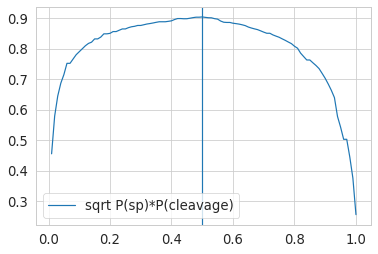

In [46]:
from sklearn.metrics import matthews_corrcoef
from scipy import stats

# df['Final_prob'] = np.sqrt(df['SP_Prediction']*df['CS_prob'])
df['Final_prob'] = df['SP_Prediction']

mcc = []

for i, v in enumerate(np.linspace(0.01, df['Final_prob'].max(), 100)): #
    y_pred = df['Final_prob'].apply(lambda x: 0 if x < v else 1)
    y_true = df['Label']
    mcc.append(matthews_corrcoef(y_true, y_pred))
    functions.progress(i+1, 100)

sns.lineplot(x=np.linspace(0.01, df['Final_prob'].max(), 100), y=mcc, label='sqrt P(sp)*P(cleavage)')
plt.axvline(x=np.linspace(0.01, df['Final_prob'].max(), 100)[np.argmax(mcc)])
print('\nMax MCC = {} for threshold = {}.'.format(round(max(mcc), 3), \
                                np.linspace(0.01, df['Final_prob'].max(), 100)[np.argmax(mcc)]));

### For cleavage

|██████████████████████████████████████████████████| 100% (100/100)  
Completed!

Max MCC = 0.85 for threshold = 0.6.


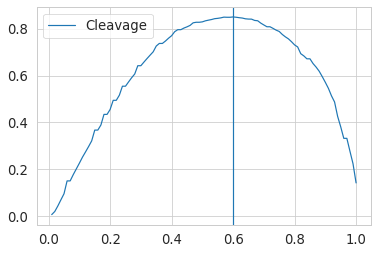

In [47]:
from sklearn.metrics import matthews_corrcoef
from scipy import stats

df['Final_prob1'] = df['CS_prob']

mcc = []

for i, v in enumerate(np.linspace(0.01, df['Final_prob1'].max(), 100)): #
    y_pred = df['Final_prob1'].apply(lambda x: 0 if x < v else 1)
    y_true = df['Label']
    mcc.append(matthews_corrcoef(y_true, y_pred))
    functions.progress(i+1, 100)

sns.lineplot(x=np.linspace(0.01, df['Final_prob1'].max(), 100), y=mcc, label='Cleavage')
plt.axvline(x=np.linspace(0.01, df['Final_prob1'].max(), 100)[np.argmax(mcc)])
print('\nMax MCC = {} for threshold = {}.'.format(round(max(mcc), 3), \
                                np.linspace(0.01, df['Final_prob'].max(), 100)[np.argmax(mcc)]));

### Combining both

|██████████████████████████████████████████████████| 100% (100/100)  
Completed!

Max MCC = 0.914 for threshold = 0.5700000000000001.


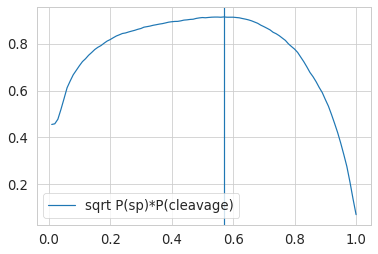

In [48]:
from sklearn.metrics import matthews_corrcoef
from scipy import stats

df['Final_prob'] = np.sqrt(df['SP_Prediction']*df['CS_prob'])

mcc = []

for i, v in enumerate(np.linspace(0.01, df['Final_prob'].max(), 100)): #
    y_pred = df['Final_prob'].apply(lambda x: 0 if x < v else 1)
    y_true = df['Label']
    mcc.append(matthews_corrcoef(y_true, y_pred))
    functions.progress(i+1, 100)

sns.lineplot(x=np.linspace(0.01, df['Final_prob'].max(), 100), y=mcc, label='sqrt P(sp)*P(cleavage)')
plt.axvline(x=np.linspace(0.01, df['Final_prob'].max(), 100)[np.argmax(mcc)])
print('\nMax MCC = {} for threshold = {}.'.format(round(max(mcc), 3), \
                                np.linspace(0.01, df['Final_prob'].max(), 100)[np.argmax(mcc)]));

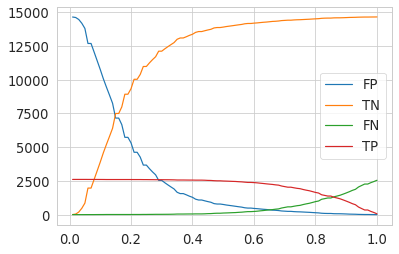

In [49]:

fps = []
tns = []
fns = []
tps = []


for i, v in enumerate(np.linspace(0.01, df['Final_prob'].max(), 100)): #

    df['Final_Predicted_Class'] = df['CS_prob'].apply(lambda x: 0 if x < v else 1)

    false = df[df['Label'] == 0].copy()
    true = df[df['Label'] == 1].copy()



    false_p = false[false['Final_Predicted_Class'] == 1].copy()
    true_n = false[false['Final_Predicted_Class'] == 0].copy()
    fps.append(false_p.shape[0])
    tns.append(true_n.shape[0])


    false_n = true[true['Final_Predicted_Class'] == 0].copy()
    true_p = true[true['Final_Predicted_Class'] == 1].copy()
    fns.append(false_n.shape[0])
    tps.append(true_p.shape[0])

labels = ['FP', 'TN', 'FN', 'TP']

for i, v in enumerate([fps, tns, fns, tps]):
    sns.lineplot(x=np.linspace(0.01, df['Final_prob'].max(), 100), y=v, label=labels[i])

|██████████████████████████████████████████████████| 100% (98/98)  
Completed!


/Volumes/userdata/student_users/bikashkumarbhandari/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Volumes/userdata/student_users/bikashkumarbhandari/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Volumes/userdata/student_users/bikashkumarbhandari/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, an

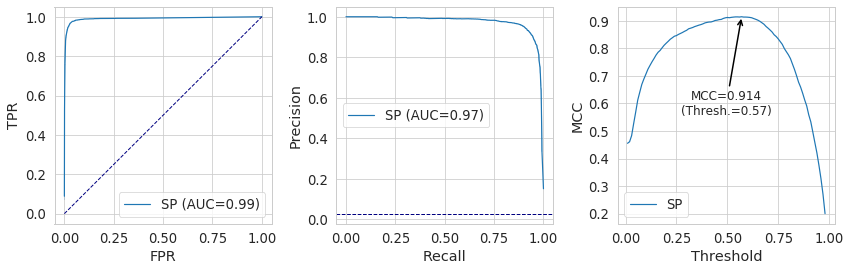

In [65]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_recall_curve


preds = df['Final_prob']
y = df['Label']

#Precision, recall
precision, recall, _ = precision_recall_curve(y, preds, )
lr_auc = auc(recall, precision)


#ROC

fpr, tpr, _ = roc_curve(y, preds)
roc_auc = auc(fpr, tpr)



mcc = []

for i, v in enumerate(np.arange(0.01, 0.99, 0.01)):
    y_pred = [0 if x <= v else 1 for x in preds]
    mcc.append(matthews_corrcoef(y, y_pred))
    functions.progress(i+1, 98)



fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4),)
sns.lineplot(fpr, tpr, label='{} (AUC={})'.format('SP', round(roc_auc, 2)), ax=ax[0])
#baseline
ax[0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

sns.lineplot(recall, precision, label='{} (AUC={})'.format('SP', round(lr_auc, 2)), ax=ax[1])
#baseline
baseline = new.Label.value_counts()[1]/new.shape[0]

ax[1].axhline(y=baseline, color='navy', lw=1, linestyle='--')
ax[0].set_xlabel('FPR')
ax[0].set_ylabel('TPR')



ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')


sns.lineplot(np.arange(0.01, 0.99, 0.01), mcc, \
             label='{}'.format('SP'), ax=ax[2])
ax[2].set_xlabel('Threshold')
ax[2].set_ylabel('MCC')

y = np.arange(0.01, 0.99, 0.01)[np.argmax(mcc)]
x = max(mcc)
# plt.axvline(x=np.arange(0.01, 0.99, 0.01)[np.argmax(mcc)])
ax[2].annotate('MCC=' + str(round(x, 3)) + '\n(Thresh.=' + str(np.round(y, 2)) + ')',
        xy=(y, x), xycoords='data',
        xytext=(0.5, 0.5), textcoords='axes fraction',
        horizontalalignment="center",
        fontsize=12,
        arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3",
                        color='black',
                        lw=1.5),
        )


fig.tight_layout()
plt.savefig('figs/Cross_validation_SP_SignalP5.0_data.pdf', bbox_inches='tight', pad_inches=0);

### Extract benchmark sequences

In [50]:
benchmark = pd.read_pickle('results/signalp5_benchmark.pkl.gz')
new = df[df['Entry'].apply(lambda x: x in benchmark.Entry.values)].copy()

In [51]:
benchmark['Label'].value_counts()

0    7246
1     211
Name: Label, dtype: int64

In [52]:
new.shape, benchmark.shape

((7457, 50), (7457, 42))

In [57]:
y_pred = new['Final_prob'].apply(lambda x: 0 if x < 0.57 else 1)
y_true = new['Label']

np.round(matthews_corrcoef(y_true, y_pred), 3)

0.815

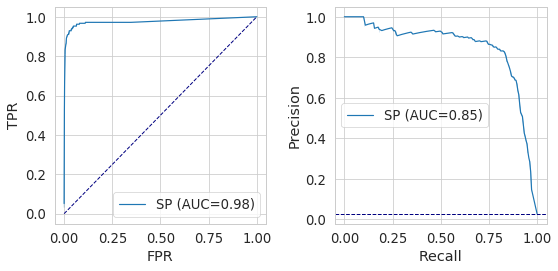

In [56]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_recall_curve


preds = new['Final_prob']
y = new['Label']

#Precision, recall
precision, recall, _ = precision_recall_curve(y, preds, )
lr_auc = auc(recall, precision)


#ROC

fpr, tpr, _ = roc_curve(y, preds)
roc_auc = auc(fpr, tpr)





fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),)
sns.lineplot(x=fpr, y=tpr, label='{} (AUC={})'.format('SP', round(roc_auc, 2)), ax=ax[0])
#baseline
ax[0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

sns.lineplot(x=recall, y=precision, label='{} (AUC={})'.format('SP', round(lr_auc, 2)), ax=ax[1])
#baseline
baseline = new.Label.value_counts()[1]/new.shape[0]

ax[1].axhline(y=baseline, color='navy', lw=1, linestyle='--')
ax[0].set_xlabel('FPR')
ax[0].set_ylabel('TPR')



ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')




fig.tight_layout()
plt.savefig('figs/Benchmark_SP_SignalP5_benchmark.pdf', bbox_inches='tight', pad_inches=0);

### Cleavage site precision and recall

In [58]:
new['Final_prob'] = np.sqrt(new['SP_Prediction']*new['CS_prob'])

new['Final_Predicted_Class'] = new['Final_prob'].apply(lambda x: 0 if x < 0.57 else 1)

false = new[new['Label'] == 0].copy()
true = new[new['Label'] == 1].copy()

false_p = false[false['Final_Predicted_Class'] == 1].copy()
true_n = false[false['Final_Predicted_Class'] == 0].copy()

false_n = true[true['Final_Predicted_Class'] == 0].copy()
true_p = true[true['Final_Predicted_Class'] == 1].copy()



csS_ = true_p.Diff.value_counts()
csp = pd.DataFrame()
csp['Distance around the\nactual cleavage site'] = csS_.index.values
csp['CS Precision'] = csS_.values/(new[new['Final_Predicted_Class'] == 1].shape[0]) #true_p.shape[0]
csp.sort_values(by='Distance around the\nactual cleavage site', inplace=True)
csp = csp.reset_index(drop=True)



csS_ = true_p.Diff.value_counts()
css = pd.DataFrame()
css['Distance around the\nactual cleavage site'] = csS_.index.values
css['CS Recall'] = csS_.values/new.Label.value_counts()[1]
css.sort_values(by='Distance around the\nactual cleavage site', inplace=True)
css = css.reset_index(drop=True)


In [59]:
#### CS precision
csp['CS Precision'].cumsum().round(3)

0     0.565
1     0.601
2     0.650
3     0.695
4     0.735
5     0.744
6     0.758
7     0.762
8     0.776
9     0.785
10    0.789
11    0.794
12    0.798
Name: CS Precision, dtype: float64

In [60]:
#### CS recall
css['CS Recall'].cumsum().round(3)

0     0.597
1     0.635
2     0.687
3     0.735
4     0.777
5     0.787
6     0.801
7     0.806
8     0.820
9     0.829
10    0.834
11    0.839
12    0.844
Name: CS Recall, dtype: float64

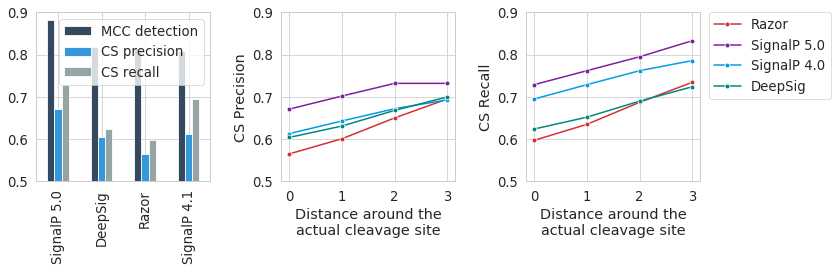

In [67]:
barplt = pd.DataFrame(columns=['MCC detection', 'CS precision', 'CS recall'], index=['Razor', 'SignalP 5.0', 'SignalP 4.1', 'DeepSig'])
# barplt.loc['RAZOR'] = [np.max(mcc), csp['CS Precision'].cumsum().round(3)[0], css['CS Recall'].cumsum().round(3)[0]]
barplt.loc['Razor'] = [0.815, csp['CS Precision'].cumsum().round(3)[0], css['CS Recall'].cumsum().round(3)[0]]

barplt.loc['SignalP 5.0'] = [0.883, 0.671, 0.729]
barplt.loc['SignalP 4.1'] = [0.808, 0.613, 0.695]
barplt.loc['DeepSig'] = [0.819, 0.604, 0.624]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4),)
sns.set_context("paper", font_scale=1.5)
flatui = ["#d32f2f", "#7b1fa2","#039be5", "#00897b", "#43a047",  "#2ecc71" ,"#ffeb3b",  "#3498db", "#95a5a6",  "#34495e", "#3498db", "#95a5a6",  "#34495e",]


# sns.set_palette(flatui)
barplt.sort_values(ascending=False, by='MCC detection').plot(kind='bar', \
                                                                ax=ax[0], \
                                                                color=["#34495e", "#3498db", "#95a5a6",],\
                                                            )#.legend(loc='lower left', facecolor='white', framealpha=1);
ax[0].set(ylim=(0.50, 0.9))

sns.lineplot(x=csp['Distance around the\nactual cleavage site'][:4],\
             y=csp['CS Precision'].cumsum()[:4], color=flatui[0], ax=ax[1], lw=1.5, marker="o")
sns.lineplot(x=csp['Distance around the\nactual cleavage site'][:4],\
             y=[0.671, 0.702, 0.732, 0.732], color=flatui[1], ax=ax[1], lw=1.5, marker="o")
sns.lineplot(x=csp['Distance around the\nactual cleavage site'][:4],\
             y=[0.613, 0.643, 0.672, 0.693], color=flatui[2], ax=ax[1], lw=1.5, marker="o")
sns.lineplot(x=csp['Distance around the\nactual cleavage site'][:4],\
             y=[0.604, 0.631, 0.668, 0.700], color=flatui[3], ax=ax[1], lw=1.5, marker="o")
ax[1].set(ylim=(0.50, 0.9))
# 
sns.lineplot(x=css['Distance around the\nactual cleavage site'][:4],\
             y=css['CS Recall'].cumsum()[:4], ax=ax[2], color=flatui[0], lw=1.5, label='Razor', marker="o")
sns.lineplot(x=css['Distance around the\nactual cleavage site'][:4],\
             y=[0.729, 0.762, 0.795, 0.833], label='SignalP 5.0', color=flatui[1], ax=ax[2], lw=1.5, marker="o")
sns.lineplot(x=css['Distance around the\nactual cleavage site'][:4],\
             y=[0.695, 0.729, 0.762, 0.786], label='SignalP 4.0',\
             color=flatui[2], ax=ax[2], lw=1.5, marker="o")
sns.lineplot(x=css['Distance around the\nactual cleavage site'][:4],\
             y=[0.624, 0.652, 0.690, 0.724], label='DeepSig', color=flatui[3], ax=ax[2], lw=1.5, marker="o")
ax[2].set(ylim=(0.50, 0.9))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



plt.tight_layout();
plt.savefig('figs/benchmarking_signalp5_data_cleavage_sites.pdf',  bbox_inches='tight', pad_inches=0)

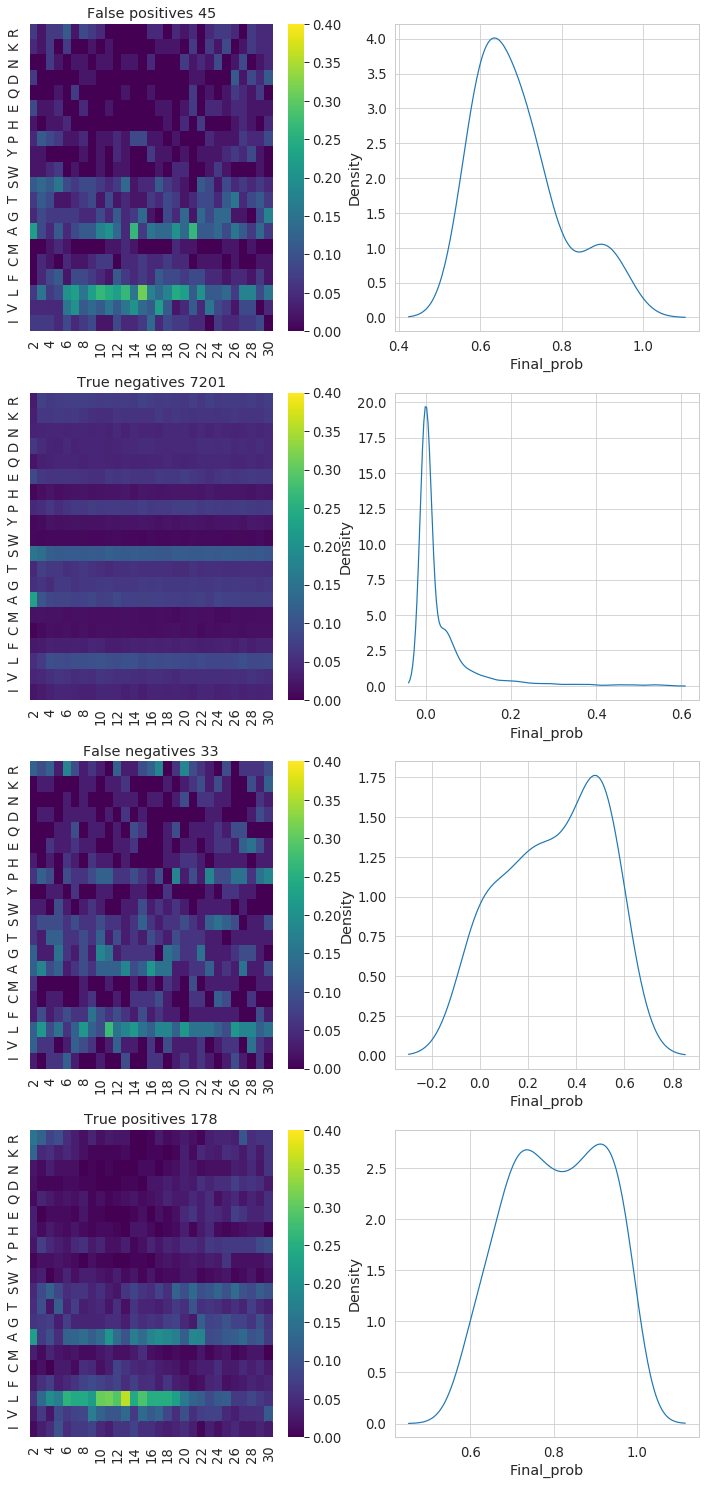

In [62]:
aa = 'RKNDQEHPYWSTGAMCFLVI'
aa = [i for i in aa]

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



false = new[new['Label'] == 0].copy()
true = new[new['Label'] == 1].copy()

false_p = false[false['Final_Predicted_Class'] == 1].copy()
true_n = false[false['Final_Predicted_Class'] == 0].copy()

false_n = true[true['Final_Predicted_Class'] == 0].copy()
true_p = true[true['Final_Predicted_Class'] == 1].copy()

titles = ['False positives {}', 'True negatives {}', 'False negatives {}', 'True positives {}']


fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 26),)


for j, v in enumerate([false_p, true_n, false_n, true_p]):
    prob_ = pd.DataFrame(columns=np.arange(1, 31), index=aa)
    hmm_df = v['Protein'].str[:30].str.split('', expand=True)[np.arange(1, 31)]
    for i in hmm_df.columns:
        all_counts = hmm_df[i].value_counts()
        for amino in aa:
            try:
                prob_.loc[amino, i] = all_counts[amino]/all_counts.sum()
            except Exception:
                prob_.loc[amino, i] = np.nan
    prob_ = prob_.fillna(0)
    sns.heatmap(prob_[np.arange(2, 31)], cmap='viridis', ax = ax[j][0], vmin=0, vmax=0.4)
    ax[j][0].set_title(titles[j].format(v.shape[0]));
    sns.kdeplot(v['Final_prob'], ax=ax[j][1])

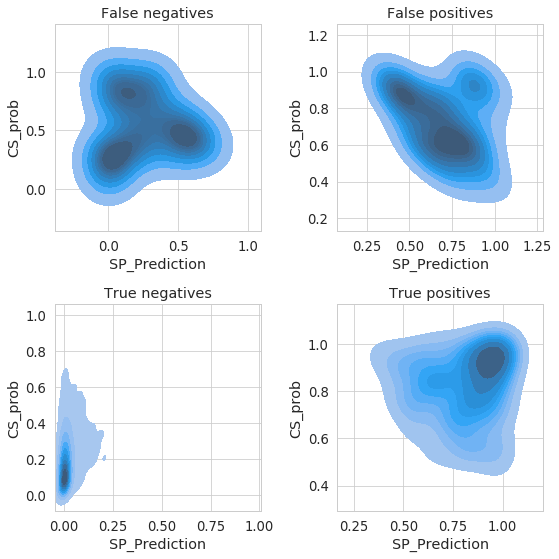

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax = axes.flatten()

sns.kdeplot(x=false_n['SP_Prediction'], \
           y=false_n['CS_prob'], shade=True, ax=ax[0])
ax[0].set_title('False negatives')
sns.kdeplot(x=false_p['SP_Prediction'], \
           y=false_p['CS_prob'], shade=True, ax=ax[1])
ax[1].set_title('False positives')

sns.kdeplot(x=true_n['SP_Prediction'], \
           y=true_n['CS_prob'], shade=True, ax=ax[2])
ax[2].set_title('True negatives')
sns.kdeplot(x=true_p['SP_Prediction'], \
           y=true_p['CS_prob'], shade=True, ax=ax[3])
ax[3].set_title('True positives')

plt.tight_layout()